# 2. Prepare data for analysis with Power BI

https://learn.microsoft.com/en-us/training/paths/prepare-data-power-bi/`

## Get Data in Model

# 3. Modeling Data and DAX
https://learn.microsoft.com/en-us/training/paths/model-data-power-bi/

## Design Semantic Model in PowerBI

```raw
Creating Relationships, Star Schema
Fact Table, Dimension Table
Configure semantic model and build relationships between tables
Configure table and column properties
```

### Date table
Create a common date table

- Source data

- DAX - CALENDARAUTO() or CALENDAR()

- Power Query

= List.Dates(#date(2011,05,31), 365*10, #duration(1,0,0,0))


Mark as the official date table

Selecting Mark as date table will remove autogenerated hierarchies from the Date field in the table that you marked as a date table. For other date fields, the auto hierarchy will still be present until you establish a relationship between that field and the date table or until you turn off the Auto Date/Time feature. You can manually add a hierarchy to your common date table by right-clicking the year, month, week, or day columns in the Fields pane and then selecting New hierarchy. This process is further discussed later in this module.


### Work with dimensions

You can drill down on the visual to view both Category and Subcategory, depending on what you want to see. Hierarchies allow you to view increasing levels of data on a single view.

Flatten parent-child hierarchy

Path = PATH(Employee[Employee ID], Employee[Manager ID])

You will use PATH(), a simple DAX function that returns a text version of the managerial path for each employee, and PATHITEM() to separate this path into each level of managerial hierarchy.

Level 1 = PATHITEM(Employee[Path],1)

### Work with relationships and cardinality And understand Granularity

## DAX formulas for Power BI Desktop
https://learn.microsoft.com/en-us/training/modules/dax-power-bi-write-formulas/1-introduction

By using Data Analysis Expressions (DAX), you can add three types of calculations to your semantic model:

- Calculated tables
- Calculated columns
- Measures

#### Calculated Tables

Calculated tables can be useful in various scenarios:

- Date tables
- Role-playing dimensions
- What-if analysis

```Bash
CALENDAR
```
For a data model which includes actual sales data and future sales forecasts, the following expression returns a date table covering the range of dates in both the Sales and Forecast tables.
```raw
= CALENDAR (MINX (Sales, [Date]), MAXX (Forecast, [Date]))
```

Role-playing dimensions
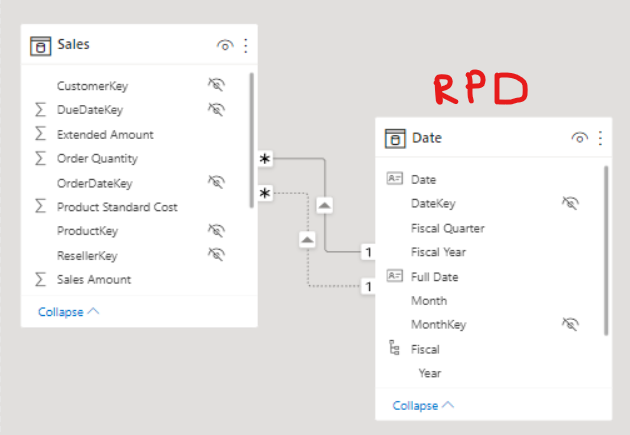

Inactive relationships are only used when they're expressly requested in a calculated formula by using the USERELATIONSHIP DAX function.

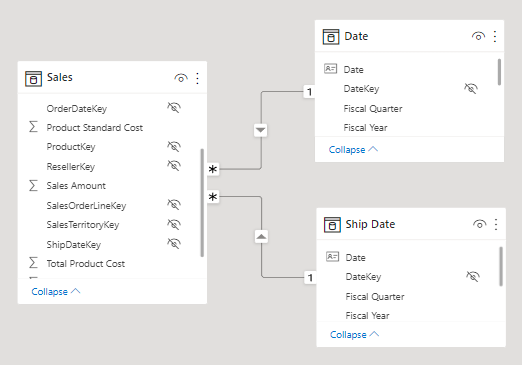

What-if analysis

When you create a what-if parameter, a calculated table is automatically added to your model.
For example, a what-if parameter could allow the report user to select a hypothetical currency exchange rate, and a measure could divide revenue values (in a local currency) by the selected rate.

Notably, what-if calculated tables aren't related to other model tables because they're not used to propagate filters. For this reason, they're sometimes called disconnected tables.

#### Calculated Columns

When added to an Import storage mode table, the formula is evaluated when the semantic model is refreshed, and it increases the storage size of your model. When added to a DirectQuery storage mode table, the formula is evaluated by the underlying source database when the table is queried.

#### Measures

Similar to a calculated column, the formula must return a single value. Unlike calculated columns, which are evaluated at data refresh time, measures are evaluated at query time. Their results are never stored in the model.

```raw
Any column can be summarized when added to a visual. Therefore, whether they're shown with the sigma symbol or not, when they're added to a visual, they can be set up as implicit measures.
```

### Write DAX formulas
Formulas are assembled by using:

- DAX functions
- DAX operators
- References to model objects
- Constant values, like the number 24 or the literal text "FY" (abbreviation for fiscal year)
- DAX variables
- Whitespace

```
Revenue YoY % =
DIVIDE(
    [Revenue]
        - CALCULATE(
            [Revenue],
            SAMEPERIODLASTYEAR('Date'[Date])
    ),
    CALCULATE(
        [Revenue],
        SAMEPERIODLASTYEAR('Date'[Date])
    )
)
```

### DAX Data Types

The BLANK data type deserves a special mention. DAX uses BLANK for both database NULL and for blank cells in Excel. BLANK doesn't mean zero. Perhaps it might be simpler to think of it as the absence of a value.

Two DAX functions are related to the BLANK data type: the BLANK DAX function returns BLANK, while the ISBLANK DAX function tests whether an expression evaluates to BLANK.

### Work with DAX functions

However, many functions exist that you won't find in Excel because they're specific to data modeling:

- Relationship navigation functions
- Filter context modification functions
- Iterator functions
- Time intelligence functions
- Path functions


##### Functions that don't originate from Excel

Two useful DAX functions that aren't specific to modeling and that don't originate from Excel are DISTINCTCOUNT and DIVIDE.

### Use DAX variables

- Improving the readability and maintenance of your formulas.
- Improving performance because variables are evaluated once and only when or if they're needed.
- Allowing (at design time) straightforward testing of a complex formula by returning the variable of interest.

```
Revenue YoY % =
VAR RevenuePriorYear =
    CALCULATE(
        [Revenue],
        SAMEPERIODLASTYEAR('Date'[Date])
    )
RETURN
    DIVIDE(
        [Revenue] - RevenuePriorYear,
        RevenuePriorYear
    )
```

Notice that the RETURN clause refers to the variable twice. This improved measure definition formula will run in at least half the time because it doesn't need to evaluate the prior year's revenue twice.

## Measures, Calculated Columns and Calculated Tables

### Measures vs Calculated columns
The areas where calculated columns and measures differ include:

- Purpose - Calculated columns extend a table with a new column, while measures define how to summarize model data.
- Evaluation - Calculated columns are evaluated by using row context at data refresh time, while measures are evaluated by using filter context at query time. Filter context is introduced in a later module; it's an important topic to understand and master so that you can achieve complex summarizations.
- Storage - Calculated columns (in Import storage mode tables) store a value for each row in the table, but a measure never stores values in the model.
- Visual use - Calculated columns (like any column) can be used to filter, group, or summarize (as an implicit measure), whereas measures are designed to summarize.

### Calculated Tables
Calculated tables have a cost: They increase the model storage size and they can prolong the data refresh time. The reason is because calculated tables recalculate when they have formula dependencies to refreshed tables.

### Calculated Columns
#### Row Context

The formula for a calculated column is evaluated for each table row. Furthermore, it's evaluated within row context, which means the current row. However, row context doesn't extend beyond the table.

```
Due Fiscal Year =
"FY"
    & YEAR('Due Date'[Due Date])
        + IF(
            MONTH('Due Date'[Due Date]) > 6,
            1
        )

```

Row context is used when calculated column formulas are evaluated. It's also used when a class of functions, known as iterator functions, are used. Iterator functions provide you with flexibility to create sophisticated summarizations.

## Filter context

Introducing ```CALCULATE```

```raw
Revenue Red = CALCULATE([Revenue], 'Product'[Color] = "Red")

Modify Filter Context -------------------------
Revenue High Margin Products =
CALCULATE(
    [Revenue],
    FILTER(
        'Product',
        'Product'[List Price] > 'Product'[Standard Cost] * 2
    )
)

Using filter modification functions -------------------------

Revenue % Total Country =
VAR CurrentRegionRevenue = [Revenue]
VAR TotalCountryRevenue =
    CALCULATE(
        [Revenue],
        REMOVEFILTERS('Sales Territory'[Region])
    )
RETURN
    DIVIDE(
        CurrentRegionRevenue,
        TotalCountryRevenue
    )

The IF() function uses the ISINSCOPE() function to test whether the region column is the level in a hierarchy of levels. When true, the DIVIDE() function is evaluated. When false, a blank value is returned because the region column isn’t in scope. -------------------------

Sales % Group =  
IF(  
 ISINSCOPE(Region[Region])  
 || ISINSCOPE(Region[Country]),  
 DIVIDE(  
 SUM(Sales[Sales]),  
 CALCULATE(  
 SUM(Sales[Sales]),  
 REMOVEFILTERS(  
 Region[Region],  
 Region[Country]  
 )  
 )  
 )  
)


Preserve filters -------------------------
Revenue Red =
CALCULATE(
    [Revenue],
    KEEPFILTERS('Product'[Color] = "Red")
)

Use inactive relationships

Revenue Shipped =
CALCULATE (
    [Revenue],
    USERELATIONSHIP('Date'[DateKey], Sales[ShipDateKey])
)

```



```
<!-- Additional content for Filter Context -->
```

## DAX time intelligence functions

Time intelligence means modifying the filter context for date filters.

One group of DAX time intelligence functions is concerned with summarizations over time:

- DATESYTD - Returns a single-column table that contains dates for the year-to-date (YTD) in the current filter context. This group also includes the DATESMTD and DATESQTD DAX functions for month-to-date (MTD) and quarter-to-date (QTD). You can pass these functions as filters into the CALCULATE DAX function.
- TOTALYTD - Evaluates an expression for YTD in the current filter context. The equivalent QTD and MTD DAX functions of TOTALQTD and TOTALMTD are also included.
- DATESBETWEEN - Returns a table that contains a column of dates that begins with a given start date and continues until a given end date.
- DATESINPERIOD - Returns a table that contains a column of dates that begins with a given start date and continues for the specified number of intervals.


Comparisons over time
Another group of DAX time intelligence functions is concerned with shifting time periods:

- DATEADD - Returns a table that contains a column of dates, shifted either forward or backward in time by the specified number of intervals from the dates in the current filter context.
- PARALLELPERIOD - Returns a table that contains a column of dates that represents a period that is parallel to the dates in the specified dates column, in the current filter context, with the dates shifted a number of intervals either forward in time or back in time.
- SAMEPERIODLASTYEAR - Returns a table that contains a column of dates that are shifted one year back in time from the dates in the specified dates column, in the current filter context.
- Many helper DAX functions for navigating backward or forward for specific time periods, all of which returns a table of dates. These helper functions include NEXTDAY, NEXTMONTH, NEXTQUARTER, NEXTYEAR, and PREVIOUSDAY, PREVIOUSMONTH, PREVIOUSQUARTER, and PREVIOUSYEAR.

```DAX
Sales YoY Growth =  
VAR SalesPriorYear =  CALCULATE(SUM(Sales[Sales]),  PARALLELPERIOD('Date'[Date],-12,MONTH) )  
RETURN  
 SalesPriorYear


Revenue PY =
VAR RevenuePriorYear = CALCULATE([Revenue], SAMEPERIODLASTYEAR('Date'[Date]))
RETURN
    RevenuePriorYear


Revenue YoY % =
VAR RevenuePriorYear = CALCULATE([Revenue], SAMEPERIODLASTYEAR('Date'[Date]))
RETURN
    DIVIDE(
        [Revenue] - RevenuePriorYear,
        RevenuePriorYear
    )
```

#### Calculate new occurrences

```raw
New Customers =
VAR CustomersLTD =
    CALCULATE(
        DISTINCTCOUNT(Sales[CustomerKey]),
        DATESBETWEEN(
            'Date'[Date],
            BLANK(),
            MAX('Date'[Date])
        ),
    'Sales Order'[Channel] = "Internet"
    )
VAR CustomersPrior =
    CALCULATE(
        DISTINCTCOUNT(Sales[CustomerKey]),
        DATESBETWEEN(
            'Date'[Date],
            BLANK(),
            MIN('Date'[Date]) - 1
        ),
        'Sales Order'[Channel] = "Internet"
    )
RETURN
    CustomersLTD - CustomersPrior

```

#### Snapshot calculations

```SQL
Stock on Hand =
CALCULATE(
    SUM(Inventory[UnitsBalance]),
    LASTDATE('Date'[Date])
)


Stock on Hand =
CALCULATE(
    SUM(Inventory[UnitsBalance]),
    LASTNONBLANK(
        'Date'[Date],
        CALCULATE(SUM(Inventory[UnitsBalance]))
    )
)
```

```
The LASTNONBLANK function evaluates its expression in row context. The CALCULATE function must be used to transition the row context to filter context to correctly evaluate the expression.
```

## Optimizing Model Performance

### 1. Review the performance of measures, relationships, and visuals. - **Performance analyzer**

clear visual cache and a clear data engine cache.

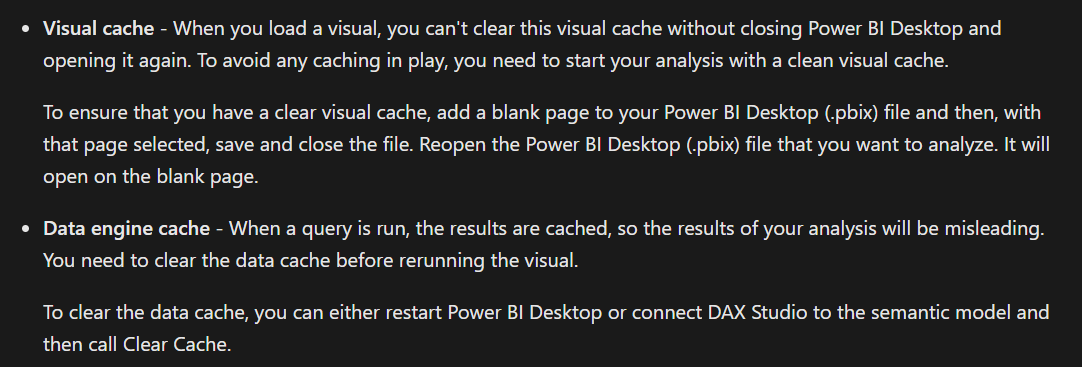

https://learn.microsoft.com/en-us/training/modules/optimize-model-power-bi/2-performance
### 2. Use variables to improve performance and troubleshooting.

- Improved performance 
- Improved readability 
- Simplified debugging
- Reduced complexity 

### 3. Improve performance by reducing cardinality levels.

Identify cardinality levels in columns - Column Distribution in Power Query

1. a summary table would contain one record per day, per week, or per month - group by date, customer, and product

2. Deciding to summarize fact-type data will always involve a tradeoff with the detail of your data.

3. Mixed mode design produces a composite model - allows you to determine a storage mode for each table. Therefore, each table can have its Storage Mode property set as Import or DirectQuery.

4. An effective technique to reduce the model size is to set the Storage Mode property for larger fact-type tables to DirectQuery. This design approach can work well in conjunction with techniques that are used to summarize your data. For example, the summarized sales data could be used to achieve high performance "summary" reporting. A drill-through page could be created to display granular sales for specific (and narrow) filter context, displaying all in-context sales orders. The drill-through page would include visuals based on a DirectQuery table to retrieve the sales order data (sales order details).

### 4. Optimize DirectQuery models with table level storage.

- the overall user experience depends heavily on the performance of the underlying data source. Slow query response times will lead to a negative user experience and, in the worst-case scenarios, queries might time out
- Also, the number of users who are opening the reports at any one time will impact the load that is placed on the data source. For example, if your report has 20 visuals in it and 10 people are using the report, 200 queries or more will exist on the data source because each visual will issue one or more queries.
- other uncontrollable factors - network latency, server refresh

Implications of using DirectQuery
- It is suitable in cases where data changes frequently and near real-time reporting is required.

- It can handle large data without the need to pre-aggregate.

- It applies data sovereignty restrictions to comply with legal requirements.

- It can be used with a multidimensional data source that contains measures such as SAP Business Warehouse (BW).

```
read the page
```
https://learn.microsoft.com/en-us/training/modules/optimize-model-power-bi/5-directquery-models

### 5. Create and manage aggregations.

- summarize all sales data and group it by date, customer, product, and so on.
- Aggregated data is cached and, therefore, uses a fraction of the resources that are required for detailed data.
- If you are experiencing a slow refresh, aggregations will help you speed up the refresh process. The smaller cache size reduces the refresh time, so data gets to users faster




## Q&A



### **Direct Query vs. Import Mode: Data Security Considerations**  

| Mode          | Data Security Features |
|--------------|-----------------------|
| **Import Mode**  | - Data is stored in Power BI cache. <br> - **Row-Level Security (RLS)** can be applied. <br> - Data masking is possible by restricting access at the dataset level. |
| **Direct Query** | - Security is managed at the **database level**. <br> - **RLS in Power BI + SQL-level security** can be enforced. <br> - Allows **dynamic data access control** based on user roles. |

### **Which is Better for Data Security?**  
- **Direct Query** is better for **real-time security enforcement** since database permissions are applied dynamically.  
- **Import Mode** is better if data needs to be **masked or transformed** before reaching users.  

For **hiding columns or restricting access**, **Direct Query** with **database-level security** is the most effective approach. 🚀


# 5. Manage workspaces and semantic models in Power BI

https://learn.microsoft.com/en-us/training/paths/manage-workspaces-datasets-power-bi/

## Create and manage workspaces in Power BI

- Admin

    - Update and delete the workspace
    - Add or remove people, including other admins
- Member

    - Add members or others with lower permissions
    - Publish, unpublish, and change permissions for an app
- Contributor

    - Create, edit, and delete content, such as reports, in the workspace
    - Publish reports to the workspace
- Viewer

    - View and interact with an item
    - Read data that's stored in workspace dataflows

---

### ✅ **Tasks Only Admins Can Perform (Not Members, Contributors, or Viewers)**

| **Admin-Only Task** | **Why It's Exclusive** |
|---------------------|------------------------|
| 🔐 **Add or remove users and assign roles** | Only Admins can manage **workspace access control**. |
| 🛑 **Delete the workspace** | This is a critical operation — only Admins have this authority. |
| ⚙️ **Edit workspace settings** (e.g. name, description, license mode) | Admins can **reconfigure workspace properties**. |
| 🔁 **Change workspace roles for other users** | Members can’t promote others or change roles. |
| 🔄 **Take ownership of reports or datasets** | Admins can **take ownership** in case the original owner is unavailable. |
| 📤 **Configure OneDrive refresh** for datasets | Admin-level permission needed for this auto-sync feature. |
| 🔄 **Publish and control deployment pipelines** (if workspace is part of pipeline) | Full control over deployments. |

---

### 🔍 Role Capabilities Overview

| Capability                                | Admin | Member | Contributor | Viewer |
|-------------------------------------------|:-----:|:------:|:-----------:|:------:|
| View content                               | ✅    | ✅     | ✅           | ✅     |
| Share content                              | ✅    | ✅     | ❌           | ❌     |
| Create/update content                      | ✅    | ✅     | ✅           | ❌     |
| Publish apps                               | ✅    | ✅     | ❌           | ❌     |
| Manage workspace roles                     | ✅    | ❌     | ❌           | ❌     |
| Delete workspace                           | ✅    | ❌     | ❌           | ❌     |
| Change settings                            | ✅    | ❌     | ❌           | ❌     |
| Take over data sources or datasets         | ✅    | ❌     | ❌           | ❌     |




### Introduction
Workspaces offer the following benefits:

Focused collaboration efforts. You can use workspaces to house reports and dashboards for use by multiple teams.

Ability to share and present reports and dashboards in a single environment.

Assurance that the highest level of security is maintained by controlling who can access semantic models, reports, and dashboards.

### Distribute a report or dashboard
- Create a workspace

- Assign workspace roles

- Create and configure an app

In the Audience tab, you're now able to choose one or more audiences with different viewing options.

- Update workspaces

### Monitor usage and performance

- Configure and view usage metric reports

**Typical opening time, Opening time trend, Daily/7-Day Performance charts** , Filters for date,

### Recommend a development life cycle strategy
Points
- Development environments: Development, Test, Production
- Configuration of deployment pipelines

### Troubleshoot data by viewing its lineage

### Configure data protection

- Sensitivity labels 

Use Microsoft sensitivity labels to label dashboards, reports, semantic models, and dataflows by using the same taxonomy that is used to classify and protect files in Microsoft 365.

Add more protection measures such as encryption and watermarks when you are exporting the data.

Use Microsoft Cloud App Security to monitor and investigate activities in Power BI.


## Manage semantic models in Power BI

### Use a Power BI gateway to connect to on-premises data sources

### Configure a semantic model scheduled refresh

### Configure incremental refresh settings

### Manage and promote semantic models

### Troubleshoot service connectivity

### Boost performance with query caching (Premium)